<a href="https://colab.research.google.com/github/XxStyleS2xX/MachineLearning/blob/main/RNAs/Perceptron_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Payán Rosales Carlos A.**


Perceptrón con Sklearn

In [ ]:
#Se importan las librerías
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [ ]:
#Se carga el dataset de iris
df = pd.read_csv('HTRU_2.csv')
xp = df.iloc[:,:8]
yp = df.iloc[:,-1]
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
#Se estandarizan lo datos
#iris
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_train_std = X_train_std[:,[1,3]]
X_test_std = sc.transform(X_test)
X_test_std = X_test_std[:,[1,3]]

#HTRU_2
xp=np.array(xp)
xp=xp[:,[3,6]]
Xp_train, Xp_test, yp_train, yp_test = train_test_split(xp, yp, test_size=0.3)
sc = StandardScaler()
sc.fit(Xp_train)
Xp_train_std = sc.transform(Xp_train)
Xp_train_std = Xp_train_std[:,[0,1]]
Xp_test_std = sc.transform(Xp_test)
Xp_test_std = Xp_test_std[:,[1,0]]

In [ ]:
#Función para la visualización de los resultados
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #Plot the decision surface

    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.figure(num='Payán Rosales 902-A')
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl,1], alpha = 0.8, c = colors[idx], marker = markers[idx], label = cl, edgecolor  = 'black')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='upper left')
    plt.show()

In [ ]:
#Entrenamiento del perceptrón iris
ppn = Perceptron(max_iter=1000, eta0=0.1, random_state=1, shuffle = True)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))


Accuracy: 0.96


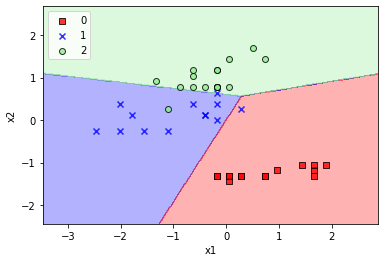

In [ ]:
#Predicción del perceptrón iris
plot_decision_regions(X_test_std, y_test, ppn)

In [ ]:
#Entrenamiento del perceptrón HTRU_2
ppn = Perceptron(max_iter=10000, eta0=0.5, random_state=1, shuffle = True)
ppn.fit(Xp_train, yp_train)
yp_pred = ppn.predict(Xp_test)
print('Accuracy: %.2f' % accuracy_score(yp_test, yp_pred))

Accuracy: 0.97


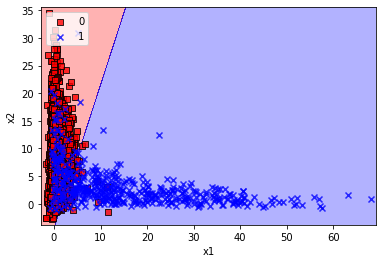

In [ ]:
#Predicción del perceptrón HTRU_2
plot_decision_regions(Xp_test, yp_test, ppn)